<a href="https://colab.research.google.com/github/tiesen243/digit-recognition/blob/main/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generate a dataset

# Fit three classifiers

# To make a prediction - pick max

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Model

### Utils

In [ ]:
def softmax(z: np.ndarray) -> np.ndarray:
  return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

In [ ]:
def cross_entropy(y: np.ndarray, probs: np.ndarray):
  return -1 * np.mean(y * np.log(probs))

In [ ]:
def maximun_likelihood(y: np.ndarray, probs: np.ndarray):
  return -1 * np.mean(np.log(probs[np.arange(len(y)), y]))

In [ ]:
def one_hot(y: np.ndarray) -> np.ndarray:
  return np.eye(len(np.unique(y)))[y]

### LogisticRegression class

In [ ]:
class LogisticRegression:
    def __init__(self, lr: float = 0.001, n_iter: int = 1000, loss: str = 'mle'):
        self.lr = lr
        self.n_iter = n_iter

        if loss == 'mle':
          self.loss_func = maximun_likelihood
        elif loss == 'cross_entropy':
          self.loss_func = cross_entropy
        else:
          raise ValueError('Loss function not supported')

        self.weights: np.ndarray
        self.bias: np.ndarray

        self.loss: list = []
        self.accuracy: list = []

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = False):
      n_samples, n_features = X.shape
      n_classes = len(np.unique(y))

      self.weights = np.zeros((n_features, n_classes))
      self.bias = np.zeros(n_classes)

      X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

      for i in range(self.n_iter):
        y_pred = self.predict_proba(X_train)

        self.loss.append(self.loss_func(one_hot(y_train), y_pred))
        self.accuracy.append(self.score(X_val, y_val))

        error = y_pred - one_hot(y_train)
        dw = (1 / n_samples) * np.dot(X_train.T, error)
        db = (1 / n_samples) * np.sum(error)

        self.weights -= self.lr * dw
        self.bias -= self.lr * db

        if verbose and i % 100 == 0:
          print(f'Iteration {i}: Loss = {self.loss[-1]:.4f}, Accuracy = {self.accuracy[-1]:.4f}')


    def predict_proba(self, X: np.ndarray) -> np.ndarray:
      y_pred = np.dot(X, self.weights) + self.bias
      return softmax(y_pred)

    def predict(self, X: np.ndarray) -> np.ndarray:
      return np.argmax(self.predict_proba(X), axis=1)

    def score(self, X: np.ndarray, y: np.ndarray):
      return np.mean(self.predict(X) == y)

## Train model

In [ ]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"Numbers of classes: {len(np.unique(y))}")

(120, 4) (30, 4) (120,) (30,)
Numbers of classes: 3


In [ ]:
model = LogisticRegression(loss='cross_entropy')
model.fit(X_train, y_train, verbose=True)

Iteration 0: Loss = 0.3662, Accuracy = 0.2500
Iteration 100: Loss = 0.3445, Accuracy = 0.4167
Iteration 200: Loss = 0.3281, Accuracy = 0.6667
Iteration 300: Loss = 0.3135, Accuracy = 0.7500
Iteration 400: Loss = 0.3005, Accuracy = 0.7500
Iteration 500: Loss = 0.2889, Accuracy = 0.7500
Iteration 600: Loss = 0.2786, Accuracy = 0.7500
Iteration 700: Loss = 0.2693, Accuracy = 0.7500
Iteration 800: Loss = 0.2610, Accuracy = 0.8333
Iteration 900: Loss = 0.2535, Accuracy = 0.8333


In [ ]:
model.score(X_test, y_test)

0.8666666666666667

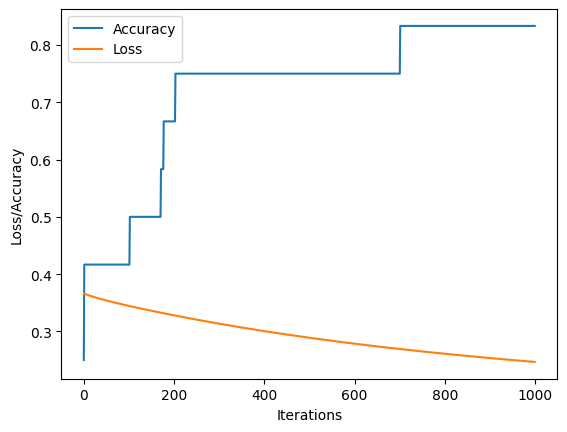

In [ ]:
plt.plot(model.accuracy, label='Accuracy')
plt.plot(model.loss, label='Loss')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.show()